In [1]:
import pandas as pd
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import MultiComparison
df = pd.read_csv("/Users/jieyichen/Desktop/INF2178_23W /FinalProject/2178finaldataset.csv")

## Descriptive Analysis

#### Age Group

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
summary_stats = df["Age_group__at_arrest_"].describe()
print("Summary Statistics for Age Group at Arrest")
print(summary_stats)

Summary Statistics for Age Group at Arrest
count                   65252
unique                      9
top       Aged 25 to 34 years
freq                    20949
Name: Age_group__at_arrest_, dtype: object


In [3]:
frequency_counts = df["Age_group__at_arrest_"].value_counts()
print("Frequency Counts for Age Group at Arrest")
print(frequency_counts)

Frequency Counts for Age Group at Arrest
Aged 25 to 34 years          20949
Aged 35 to 44 years          16242
Aged 18 to 24 years          10041
Aged 45 to 54 years           9066
Aged 55 to 64 years           4590
Aged 17 years and younger     1681
Aged 17 years and under       1361
Aged 65 years and older        698
Aged 65 and older              624
Name: Age_group__at_arrest_, dtype: int64


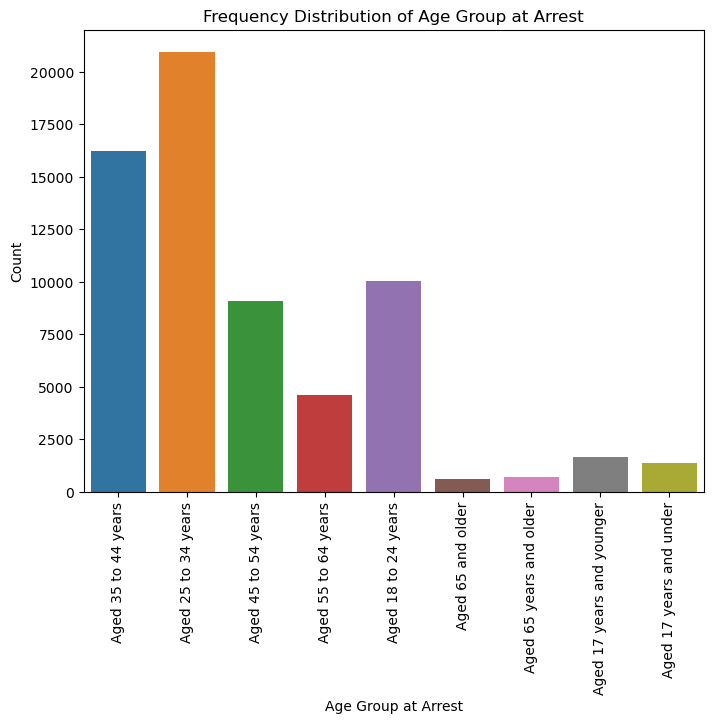

In [4]:
plt.figure(figsize = (8, 6))
sns.countplot(data=df, x="Age_group__at_arrest_")
plt.xlabel("Age Group at Arrest")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.title("Frequency Distribution of Age Group at Arrest")
plt.show()

#### Gender

In [5]:
summary_stats = df["Sex"].describe()
print("Summary Statistics for Gender")
print(summary_stats)

Summary Statistics for Gender
count     65276
unique        3
top           M
freq      52650
Name: Sex, dtype: object


In [6]:
frequency_counts = df["Sex"].value_counts()
print("Frequency Counts for Gender")
print(frequency_counts)

Frequency Counts for Gender
M    52650
F    12617
U        9
Name: Sex, dtype: int64


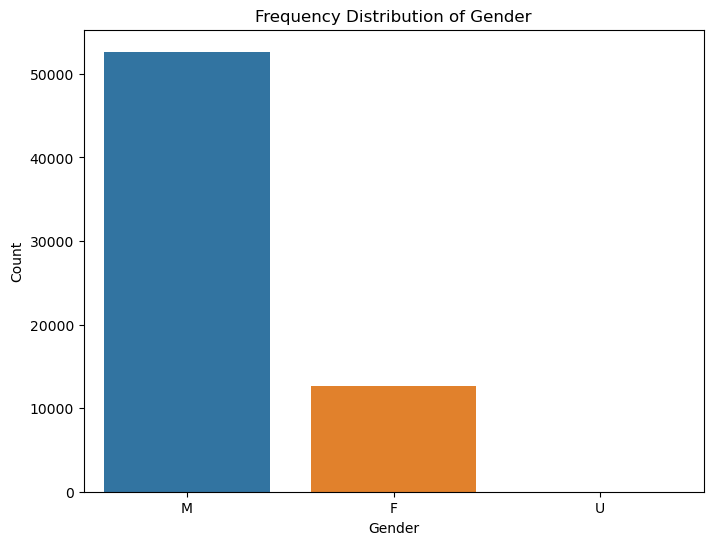

In [7]:
plt.figure(figsize = (8, 6))
sns.countplot(data=df, x="Sex")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Frequency Distribution of Gender")
plt.show()

#### Perceived Race

In [8]:
summary_stats = df["Perceived_Race"].describe()
print("Summary Statistics for Perceived Race")
print(summary_stats)

Summary Statistics for Perceived Race
count     65272
unique        8
top       White
freq      27723
Name: Perceived_Race, dtype: object


In [9]:
frequency_counts = df["Perceived_Race"].value_counts()
print("Frequency Counts for Perceived Race")
print(frequency_counts)

Frequency Counts for Perceived Race
White                   27723
Black                   17526
Unknown or Legacy        5056
East/Southeast Asian     4415
South Asian              3613
Middle-Eastern           3237
Indigenous               1934
Latino                   1768
Name: Perceived_Race, dtype: int64


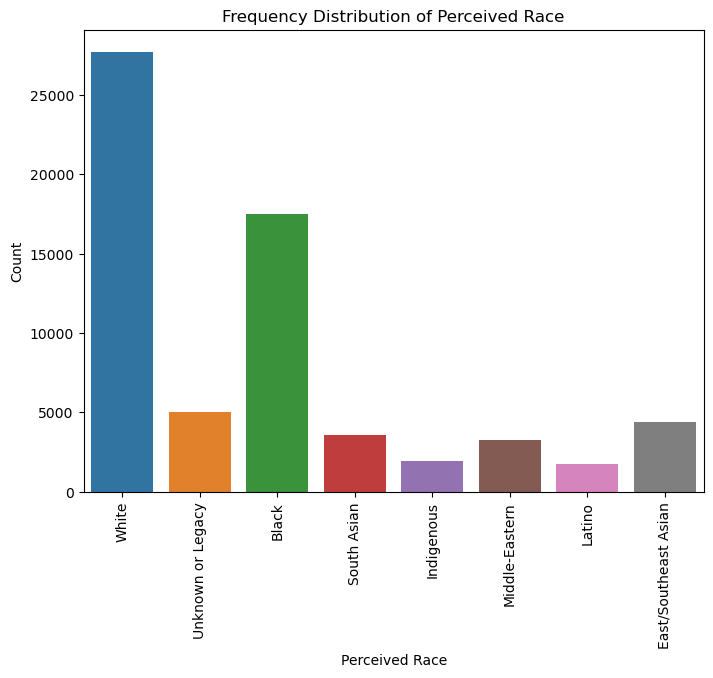

In [10]:
plt.figure(figsize = (8, 6))
sns.countplot(data=df, x="Perceived_Race")
plt.xlabel("Perceived Race")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.title("Frequency Distribution of Perceived Race")
plt.show()

#### Youth or Adult

In [13]:
df = pd.read_csv("/Users/jieyichen/Desktop/INF2178_23W /FinalProject/2178finaldataset.csv")
s = df["Youth_at_arrest__under_18_years"]
s.replace("Youth (aged 17 years and under)", "Youth (aged 17 and younger)", inplace = True)
df["Youth_at_arrest__under_18_years"] = s
summary_stats = df["Youth_at_arrest__under_18_years"].describe()
print("Summary Statistics for Youth or Adult")
print(summary_stats)

Summary Statistics for Youth or Adult
count           65276
unique              2
top       Not a youth
freq            62234
Name: Youth_at_arrest__under_18_years, dtype: object


In [14]:
frequency_counts = df["Youth_at_arrest__under_18_years"].value_counts()
print("Frequency Counts for Youth or Adult")
print(frequency_counts)

Frequency Counts for Youth or Adult
Not a youth                    62234
Youth (aged 17 and younger)     3042
Name: Youth_at_arrest__under_18_years, dtype: int64


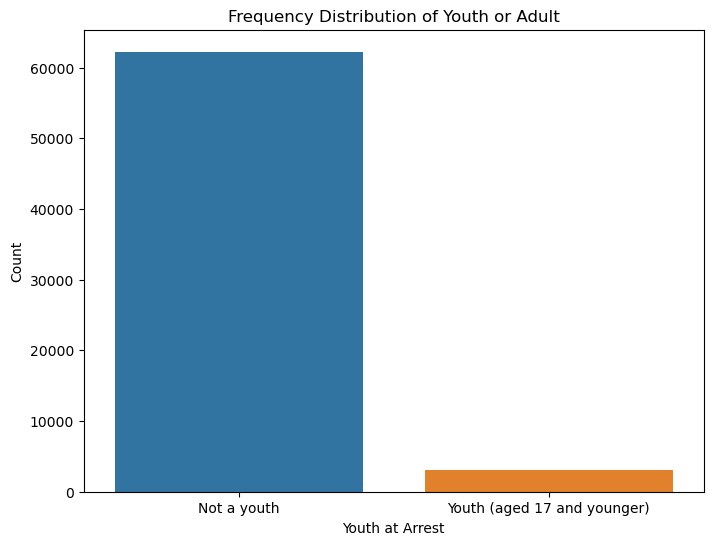

In [15]:
plt.figure(figsize = (8, 6))
sns.countplot(data=df, x="Youth_at_arrest__under_18_years")
plt.xlabel("Youth at Arrest")
plt.ylabel("Count")
plt.title("Frequency Distribution of Youth or Adult")
plt.show()

<AxesSubplot:xlabel='Youth_at_arrest__under_18_years'>

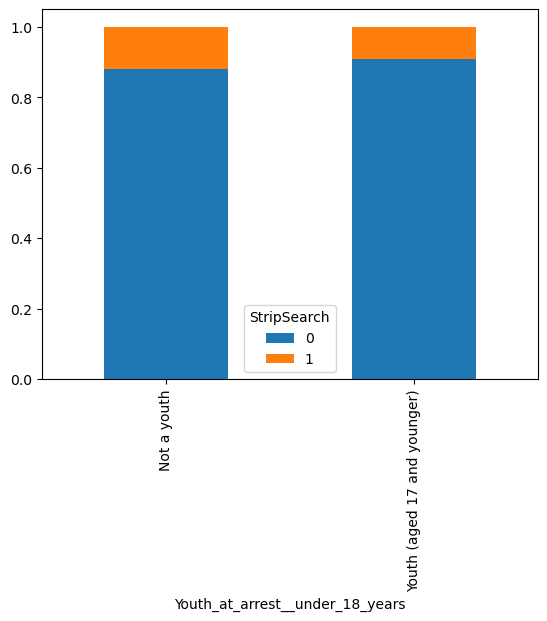

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
tab = pd.crosstab(df["Youth_at_arrest__under_18_years"],
                 df["StripSearch"],
                 normalize = "index")
tab.plot(kind = "bar", stacked = True)

## RQ2: Does the age of the suspect have an impact on the likelihood of a strip search being conducted during an arrest?

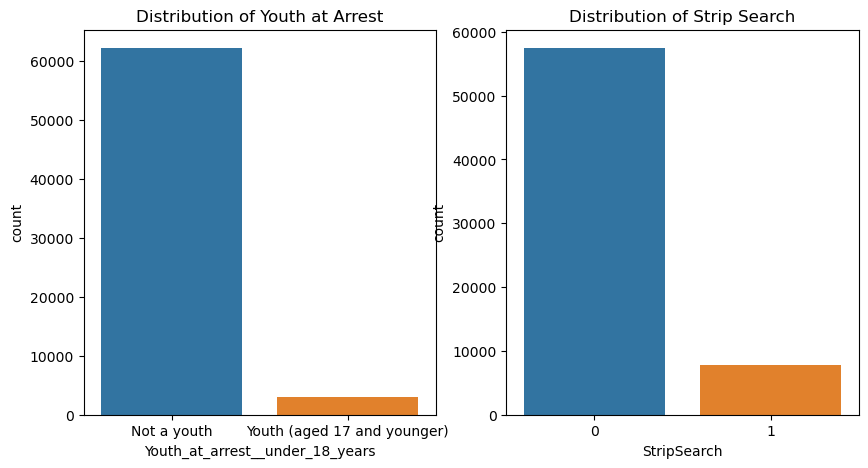

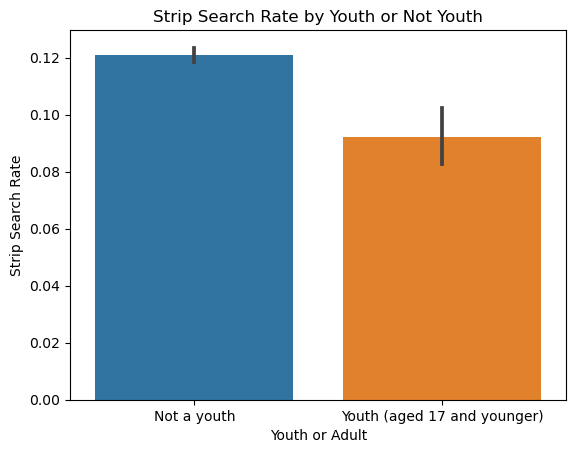

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/Users/jieyichen/Desktop/INF2178_23W /FinalProject/2178finaldataset.csv")
s = df["Youth_at_arrest__under_18_years"]
s.replace("Youth (aged 17 years and under)", "Youth (aged 17 and younger)", inplace = True)
df["Youth_at_arrest__under_18_years"] = s
df_sub = df[["Youth_at_arrest__under_18_years", "StripSearch"]]
youth_counts = df["Youth_at_arrest__under_18_years"].value_counts()
ss_counts = df["StripSearch"].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(x = "Youth_at_arrest__under_18_years", data = df_sub, ax = axes[0])
sns.countplot(x = "StripSearch", data = df_sub, ax = axes[1])
axes[0].set_title("Distribution of Youth at Arrest")
axes[1].set_title("Distribution of Strip Search")
plt.show()

proportions = df_sub.groupby("Youth_at_arrest__under_18_years")["StripSearch"].mean()

sns.barplot(x = "Youth_at_arrest__under_18_years", y = "StripSearch", data = df_sub)
plt.title("Strip Search Rate by Youth or Not Youth")
plt.xlabel("Youth or Adult")
plt.ylabel("Strip Search Rate")
plt.show()

In [20]:
print(df.groupby("Youth_at_arrest__under_18_years")["StripSearch"].mean())
print(df.groupby("Youth_at_arrest__under_18_years")["StripSearch"].std())

Youth_at_arrest__under_18_years
Not a youth                    0.120850
Youth (aged 17 and younger)    0.092045
Name: StripSearch, dtype: float64
Youth_at_arrest__under_18_years
Not a youth                    0.325956
Youth (aged 17 and younger)    0.289137
Name: StripSearch, dtype: float64


In [21]:
group1 = df["StripSearch"][df["Youth_at_arrest__under_18_years"] == "Youth (aged 17 and younger)"]
group2 = df["StripSearch"][df["Youth_at_arrest__under_18_years"] == "Not a youth"]
group1 = np.array(group1)
group2 = np.array(group2)
f = np.var(group1, ddof = 1) / np.var(group2, ddof = 1)
nun = group1.size - 1
dun = group2.size - 1
p = 1 - scipy.stats.f.cdf(f, nun, dun)
p

1.0

In [22]:
ttest_ind(df["StripSearch"][df["Youth_at_arrest__under_18_years"] == "Youth (aged 17 and younger)"],
         df["StripSearch"][df["Youth_at_arrest__under_18_years"] == "Not a youth"],
         equal_var = True)

Ttest_indResult(statistic=-4.783022702892609, pvalue=1.730548466516233e-06)

In [23]:
import statsmodels.stats.power as smp
effect_size = 0.2
alpha = 0.05
power = 0.8
nobs = None

sample_size = smp.GofChisquarePower().solve_power(effect_size = effect_size,
                                                 alpha = alpha,
                                                 power = power,
                                                 nobs = nobs)
print("Sample Size: ", sample_size)

Sample Size:  196.221512735596


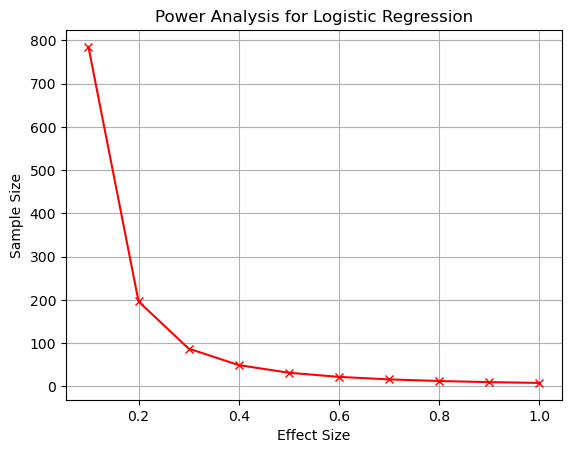

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.stats.power as smp

# Define input parameters
effect_sizes = np.linspace(0.1, 1, num=10)   # range of effect sizes
alpha = 0.05                               # significance level
power = 0.8                                # desired power
nobs = None                                 # sample size (set to None to calculate sample size)

# Calculate sample size for each effect size
sample_sizes = []
for effect_size in effect_sizes:
    sample_size = smp.GofChisquarePower().solve_power(effect_size=effect_size, alpha=alpha, power=power, nobs=nobs)
    sample_sizes.append(sample_size)

# Plot the results
plt.plot(effect_sizes, sample_sizes, marker='x', color = "red")
plt.xlabel('Effect Size')
plt.ylabel('Sample Size')
plt.title('Power Analysis for Logistic Regression')
plt.grid(True)
plt.show()


In [26]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
df = pd.read_csv("/Users/jieyichen/Desktop/INF2178_23W /FinalProject/2178finaldataset.csv")
s = df["Youth_at_arrest__under_18_years"]
s.replace("Youth (aged 17 years and under)", "Youth (aged 17 and younger)", inplace = True)
df["Youth_at_arrest__under_18_years"] = s

In [27]:
df = pd.get_dummies(df, columns = ["Youth_at_arrest__under_18_years"], drop_first = True)
df

X = df[["Youth_at_arrest__under_18_years_Youth (aged 17 and younger)"]]
y = df["StripSearch"]

X = sm.add_constant(X)
model = sm.Logit(y, X).fit()

coefficients = model.params[1:]
odds_ratios = np.exp(coefficients)

print("Coefficients: ")
print(coefficients)
print("\nOdds Ratios: ")
print(odds_ratios)

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.365756
         Iterations 6
Coefficients: 
Youth_at_arrest__under_18_years_Youth (aged 17 and younger)   -0.304518
dtype: float64

Odds Ratios: 
Youth_at_arrest__under_18_years_Youth (aged 17 and younger)    0.737478
dtype: float64
                           Logit Regression Results                           
Dep. Variable:            StripSearch   No. Observations:                65276
Model:                          Logit   Df Residuals:                    65274
Method:                           MLE   Df Model:                            1
Date:                Sun, 16 Apr 2023   Pseudo R-squ.:               0.0005130
Time:                        19:23:27   Log-Likelihood:                -23875.
converged:                       True   LL-Null:                       -23887.
Covariance Type:            nonrobust   LLR p-value:                 7.404e-07
                                                              

In [28]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.graphics.regressionplots as plt_regress
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
max_vif = max(vif)
print(f"Max VIF: {max_vif}")


Max VIF: 1.048880033422245


In [29]:
pip install pingouin

Note: you may need to restart the kernel to use updated packages.


In [30]:
from pingouin import ancova
from scipy import stats
import pandas as pd
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import MultiComparison
import scipy.stats
from statsmodels.stats.power import TTestIndPower

# EDA RQ1

Variable: sex

In [31]:
df = df[df.Sex != "U"].dropna()
print(df["Sex"].value_counts())

M    6123
F    1208
Name: Sex, dtype: int64


Variable: Preceived Race with male and number of arrests 

<AxesSubplot:title={'center':'Number of Arrests by Sex'}, xlabel='Sex', ylabel='Number of Arrests'>

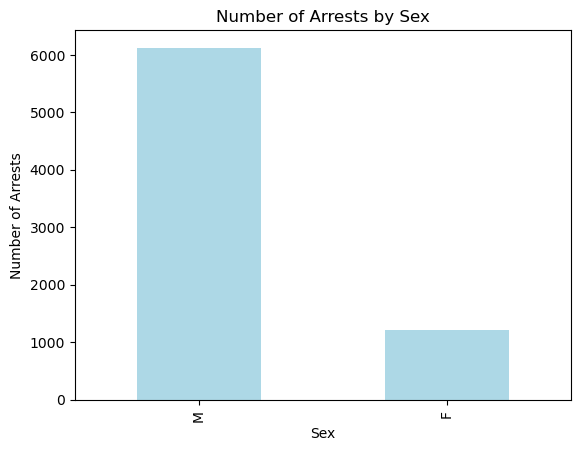

In [32]:
df["Sex"].value_counts().plot(kind = "bar", 
                              title = "Number of Arrests by Sex",
                              xlabel = "Sex", 
                              ylabel = "Number of Arrests",
                              color = "lightblue")

Variable: Preceived Race for males/females and number of arrests

/Users/jieyichen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  if __name__ == "__main__":


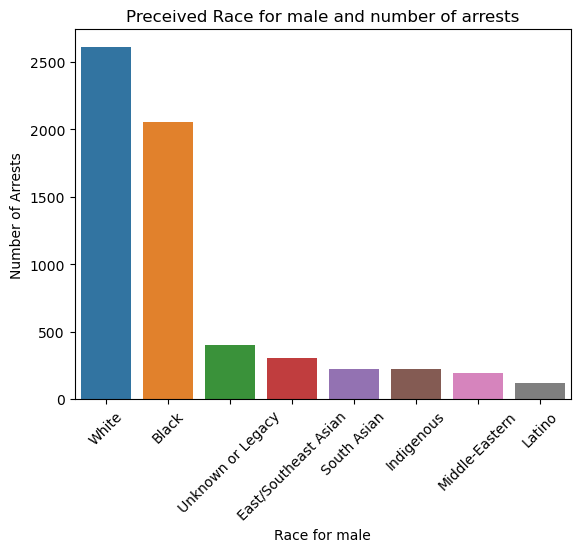

In [33]:
# Filter the data for males
male = df[df['Sex'] == 'M']

# Create a DataFrame with race for males and the number of arrests
race_male = male['Perceived_Race'].value_counts().reset_index()
race_male.columns = ['Perceived_Race', 'Number_of_Arrests']

# Plot the bar chart
sns.barplot(x='Perceived_Race', y='Number_of_Arrests', data=race_male, ci=None)
plt.xlabel('Race for male')
plt.ylabel('Number of Arrests')
plt.title('Preceived Race for male and number of arrests')
plt.xticks(rotation=45) 
plt.show()

/Users/jieyichen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  if __name__ == "__main__":


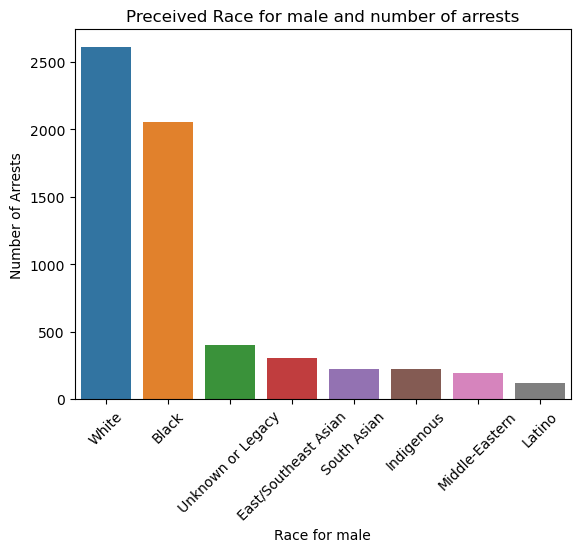

In [34]:
# Filter the data for males
male = df[df['Sex'] == 'M']

# Create a DataFrame with race for males and the number of arrests
race_male = male['Perceived_Race'].value_counts().reset_index()
race_male.columns = ['Perceived_Race', 'Number_of_Arrests']

# Plot the bar chart
sns.barplot(x='Perceived_Race', y='Number_of_Arrests', data=race_male, ci=None)
plt.xlabel('Race for male')
plt.ylabel('Number of Arrests')
plt.title('Preceived Race for male and number of arrests')
plt.xticks(rotation=45) 
plt.show()

/Users/jieyichen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  if __name__ == "__main__":


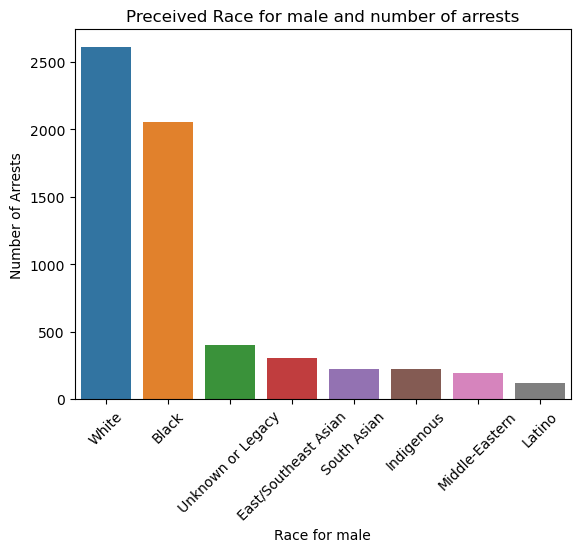

In [35]:
# Filter the data for males
male = df[df['Sex'] == 'M']

# Create a DataFrame with race for males and the number of arrests
race_male = male['Perceived_Race'].value_counts().reset_index()
race_male.columns = ['Perceived_Race', 'Number_of_Arrests']

# Plot the bar chart
sns.barplot(x='Perceived_Race', y='Number_of_Arrests', data=race_male, ci=None)
plt.xlabel('Race for male')
plt.ylabel('Number of Arrests')
plt.title('Preceived Race for male and number of arrests')
plt.xticks(rotation=45) 
plt.show()

Variable: Age group for males/females and number of arrests

In [36]:
# Rename 'Aged 17 years and under' to 'Aged 17 years and younger'
df['Age_group__at_arrest_'] = df['Age_group__at_arrest_'].replace('Aged 17 years and under', 'Aged 17 years and younger')
# Rename 'Aged 65 and older' to 'Aged 65 years and older'
df['Age_group__at_arrest_'] = df['Age_group__at_arrest_'].replace('Aged 65 and older', 'Aged 65 years and older')
df['Age_group__at_arrest_'].unique()

array(['Aged 25 to 34 years', 'Aged 35 to 44 years',
       'Aged 18 to 24 years', 'Aged 45 to 54 years',
       'Aged 55 to 64 years', 'Aged 65 years and older',
       'Aged 17 years and younger'], dtype=object)

/Users/jieyichen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  if __name__ == "__main__":


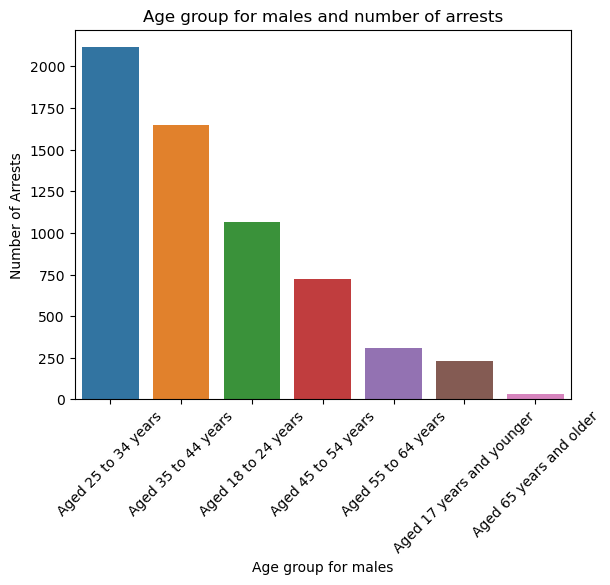

In [37]:
# Filter the data for males
male = df[df['Sex'] == 'M']

# Create a DataFrame with race for males and the number of arrests
age_male = male['Age_group__at_arrest_'].value_counts().reset_index()
age_male.columns = ['Age_group__at_arrest_', 'Number_of_Arrests']

# Plot the bar chart
sns.barplot(x='Age_group__at_arrest_', y='Number_of_Arrests', data=age_male, ci=None)
plt.xlabel('Age group for males')
plt.ylabel('Number of Arrests')
plt.title('Age group for males and number of arrests')
plt.xticks(rotation=45) 
plt.show()

/Users/jieyichen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  if __name__ == "__main__":


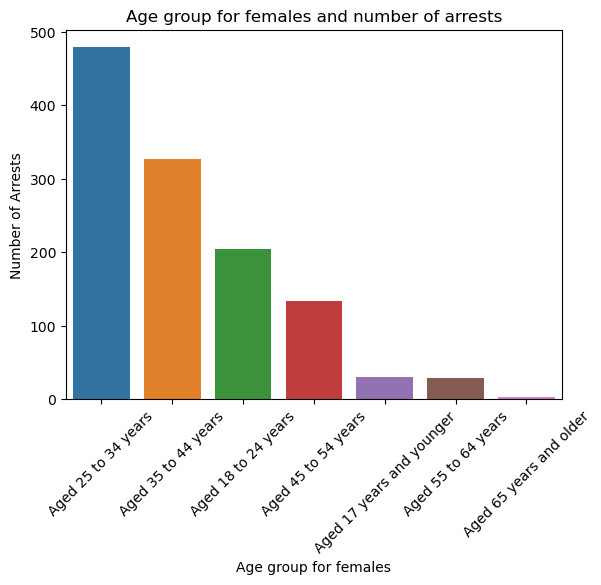

In [38]:
# Filter the data for females
female = df[df['Sex'] == 'F']

# Create a DataFrame with race for males and the number of arrests
age_female = female['Age_group__at_arrest_'].value_counts().reset_index()
age_female.columns = ['Age_group__at_arrest_', 'Number_of_Arrests']

# Plot the bar chart
sns.barplot(x='Age_group__at_arrest_', y='Number_of_Arrests', data=age_female, ci=None)
plt.xlabel('Age group for females')
plt.ylabel('Number of Arrests')
plt.title('Age group for females and number of arrests')
plt.xticks(rotation=45) 
plt.show()

# RQ1

Is there a difference in the number of people arrested between male and female after controlling for the race group and age group

In [39]:
df_1 = df[['Perceived_Race', 'Sex', 'Age_group__at_arrest_']].dropna()
df_1
df_1['Age_group__at_arrest_'].unique()
df_1_new = df_1.groupby(['Perceived_Race', 'Sex', 'Age_group__at_arrest_']).size().reset_index(name='Number_of_arrests')
df_1_new

,Perceived_Race,Sex,Age_group__at_arrest_,Number_of_arrests
0,Black,F,Aged 17 years and younger,11
1,Black,F,Aged 18 to 24 years,80
2,Black,F,Aged 25 to 34 years,78
3,Black,F,Aged 35 to 44 years,42
4,Black,F,Aged 45 to 54 years,31
...,...,...,...,...
96,White,M,Aged 25 to 34 years,885
97,White,M,Aged 35 to 44 years,829
98,White,M,Aged 45 to 54 years,402
99,White,M,Aged 55 to 64 years,195


In [40]:
male_data = df_1_new[df_1_new['Sex'] == 'M']
female_data = df_1_new[df_1_new['Sex'] == 'F']


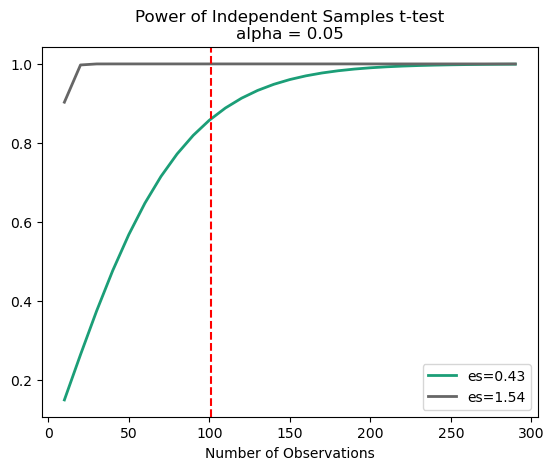

In [41]:
mean_male = np.mean(male_data["Number_of_arrests"])
mean_female = np.mean(female_data["Number_of_arrests"])
difference = abs(mean_male - mean_female)
std_male = male_data['Number_of_arrests'].std()
std_female = female_data['Number_of_arrests'].std()
effect_size = np.array([difference/std_male, difference/std_female])
sample_size = np.array(range(10, 300, 10))
# plot the power test, the dotted red line is our sample size
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
power_analysis = TTestIndPower()
fig = power_analysis.plot_power(
    dep_var='nobs', nobs=sample_size,  
    effect_size=effect_size, alpha=0.05, ax=ax, 
    title='Power of Independent Samples t-test\nalpha = 0.05')
ax.axvline(x=len(df_1_new), color='r', linestyle='--')

# T-Test 

In [42]:
# t-test for each race group
for race in df_1_new['Perceived_Race'].unique():
    male_counts = male_data[male_data['Perceived_Race'] == race]['Number_of_arrests']
    female_counts = female_data[female_data['Perceived_Race'] == race]['Number_of_arrests']
    t, p = stats.ttest_ind(male_counts, female_counts)
    print(f"T-test for {race}: t = {t}, p-value = {p}")

T-test for Black: t = 2.213777153263649, p-value = 0.04889462990463092
T-test for East/Southeast Asian: t = 2.662475616005761, p-value = 0.02208883729951014
T-test for Indigenous: t = 1.7318837113727423, p-value = 0.11396813290714461
T-test for Latino: t = 2.0857798667832292, p-value = 0.06357799086741917
T-test for Middle-Eastern: t = 3.216430179807393, p-value = 0.010549587198413557
T-test for South Asian: t = 2.1645386194806613, p-value = 0.053281571609012805
T-test for Unknown or Legacy: t = 1.8074996028913932, p-value = 0.09808009397761062
T-test for White: t = 1.900481167833548, p-value = 0.08165626917087805


In [43]:
# t-test for each age group
for age in df_1_new['Age_group__at_arrest_'].unique():
    male_arrests = male_data[male_data['Age_group__at_arrest_'] == age]['Number_of_arrests']
    female_arrests = female_data[female_data['Age_group__at_arrest_'] == age]['Number_of_arrests']
    t, p = stats.ttest_ind(male_arrests, female_arrests)
    print(f"T-test for {age}: t = {t}, p-value = {p}")

T-test for Aged 17 years and younger: t = 1.5174273917436079, p-value = 0.1530954082873311
T-test for Aged 18 to 24 years: t = 1.7278982549478694, p-value = 0.1059892214716543
T-test for Aged 25 to 34 years: t = 1.596576696847683, p-value = 0.13267904484704623
T-test for Aged 35 to 44 years: t = 1.6120707774255387, p-value = 0.12925414844741145
T-test for Aged 45 to 54 years: t = 1.5159367773977905, p-value = 0.15178554573988345
T-test for Aged 55 to 64 years: t = 1.0842620228469229, p-value = 0.30144124119982696
T-test for Aged 65 years and older: t = 1.2702392000219216, p-value = 0.24458891340240918


# ANCOVA

In [44]:
# convert race and age group to dummy variable
df_1_new = pd.get_dummies(df_1_new, columns=['Perceived_Race','Age_group__at_arrest_'])
df_1_new

,Sex,Number_of_arrests,Perceived_Race_Black,Perceived_Race_East/Southeast Asian,Perceived_Race_Indigenous,Perceived_Race_Latino,Perceived_Race_Middle-Eastern,Perceived_Race_South Asian,Perceived_Race_Unknown or Legacy,Perceived_Race_White,Age_group__at_arrest__Aged 17 years and younger,Age_group__at_arrest__Aged 18 to 24 years,Age_group__at_arrest__Aged 25 to 34 years,Age_group__at_arrest__Aged 35 to 44 years,Age_group__at_arrest__Aged 45 to 54 years,Age_group__at_arrest__Aged 55 to 64 years,Age_group__at_arrest__Aged 65 years and older
0,F,11,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,F,80,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,F,78,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,F,42,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,F,31,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,M,885,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
97,M,829,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
98,M,402,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
99,M,195,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [45]:
# rename the columns to avoid syntax error
df_1_new.columns = df_1_new.columns.str.replace(' ', '')
df_1_new.columns = df_1_new.columns.str.replace('/', 'OR')
df_1_new.columns = df_1_new.columns.str.replace('&', 'AND')
df_1_new.columns = df_1_new.columns.str.replace('-', '_')
df_1_new.columns = df_1_new.columns.str.replace('__', '_')
df_1_new.columns

Index(['Sex', 'Number_of_arrests', 'Perceived_Race_Black',
       'Perceived_Race_EastORSoutheastAsian', 'Perceived_Race_Indigenous',
       'Perceived_Race_Latino', 'Perceived_Race_Middle_Eastern',
       'Perceived_Race_SouthAsian', 'Perceived_Race_UnknownorLegacy',
       'Perceived_Race_White', 'Age_group_at_arrest_Aged17yearsandyounger',
       'Age_group_at_arrest_Aged18to24years',
       'Age_group_at_arrest_Aged25to34years',
       'Age_group_at_arrest_Aged35to44years',
       'Age_group_at_arrest_Aged45to54years',
       'Age_group_at_arrest_Aged55to64years',
       'Age_group_at_arrest_Aged65yearsandolder'],
      dtype='object')

In [46]:
# convert race group to numerical values
new_cols = ['Perceived_Race_Black',
       'Perceived_Race_EastORSoutheastAsian', 'Perceived_Race_Indigenous',
       'Perceived_Race_Latino', 'Perceived_Race_Middle_Eastern',
       'Perceived_Race_SouthAsian', 'Perceived_Race_UnknownorLegacy',
       'Perceived_Race_White',
       'Age_group_at_arrest_Aged17yearsandyounger',
       'Age_group_at_arrest_Aged18to24years',
       'Age_group_at_arrest_Aged25to34years',
       'Age_group_at_arrest_Aged35to44years',
       'Age_group_at_arrest_Aged45to54years',
       'Age_group_at_arrest_Aged55to64years',
       'Age_group_at_arrest_Aged65yearsandolder']
df_1_new[new_cols] = df_1_new[new_cols].astype(int)
df_1_new[new_cols]

,Perceived_Race_Black,Perceived_Race_EastORSoutheastAsian,Perceived_Race_Indigenous,Perceived_Race_Latino,Perceived_Race_Middle_Eastern,Perceived_Race_SouthAsian,Perceived_Race_UnknownorLegacy,Perceived_Race_White,Age_group_at_arrest_Aged17yearsandyounger,Age_group_at_arrest_Aged18to24years,Age_group_at_arrest_Aged25to34years,Age_group_at_arrest_Aged35to44years,Age_group_at_arrest_Aged45to54years,Age_group_at_arrest_Aged55to64years,Age_group_at_arrest_Aged65yearsandolder
0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
97,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
98,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
99,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [47]:
# perform one-way ancova test
ancova(data=df_1_new, dv='Number_of_arrests', covar=['Perceived_Race_Black',
       'Perceived_Race_EastORSoutheastAsian', 'Perceived_Race_Indigenous',
       'Perceived_Race_Latino', 'Perceived_Race_Middle_Eastern',
       'Perceived_Race_SouthAsian', 'Perceived_Race_UnknownorLegacy',
       'Perceived_Race_White',
       'Age_group_at_arrest_Aged17yearsandyounger',
       'Age_group_at_arrest_Aged18to24years',
       'Age_group_at_arrest_Aged25to34years',
       'Age_group_at_arrest_Aged35to44years',
       'Age_group_at_arrest_Aged45to54years',
       'Age_group_at_arrest_Aged55to64years',
       'Age_group_at_arrest_Aged65yearsandolder'], between='Sex')

,Source,SS,DF,F,p-unc,np2
0,Sex,2.624882e+05,1,18.452291,4.562805e-05,0.176658
1,Perceived_Race_Black,1.780786e+05,1,12.518498,6.524064e-04,0.127067
2,Perceived_Race_EastORSoutheastAsian,2.568032e+04,1,1.805265,1.826118e-01,0.020560
3,Perceived_Race_Indigenous,3.007971e+04,1,2.114532,1.495466e-01,0.023998
4,Perceived_Race_Latino,5.304257e+04,1,3.728765,5.677723e-02,0.041556
5,Perceived_Race_Middle_Eastern,4.906879e+04,1,3.449418,6.669694e-02,0.038563
6,Perceived_Race_SouthAsian,2.981449e+04,1,2.095887,1.513317e-01,0.023791
7,Perceived_Race_UnknownorLegacy,1.237397e+04,1,0.869860,3.536051e-01,0.010013
8,Perceived_Race_White,5.217337e+05,1,36.676627,3.559488e-08,0.298970
9,Age_group_at_arrest_Aged17yearsandyounger,3.652450e+04,1,2.567585,1.127410e-01,0.028990
